In [23]:
%run ./draw.py

In [24]:
aOrigin = np.array([
    [2, 1],
    [5, 1],
    [5, 3],
    [2, 3],
    [0, 0]
])
bOrigin = np.array([
    [2, 3],
    [4, 3],
    [4, 4],
    [2, 4],
    [0, 0]
])

aPosOrigin = np.array([3.5, 2])
bPosOrigin = np.array([3, 3.5])

ahOrigin = np.array([1.5, 1])
bhOrigin = np.array([1, 0.5])

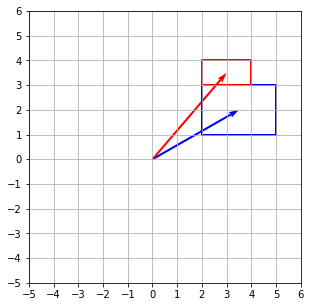

In [25]:
draw = Draw()
draw.rect(aOrigin, 'b')
draw.rect(bOrigin)
draw.v(aPosOrigin, 'b')
draw.v(bPosOrigin)
draw.render([-5, 7])

In [26]:
rotateA = np.array([
    [math.cos(math.pi / 180 * 40), math.sin(math.pi / 180 * 40) * -1],
    [math.sin(math.pi / 180 * 40), math.cos(math.pi / 180 * 40)]
])

rotateB = np.array([
    [math.cos(math.pi / 180 * 50), math.sin(math.pi / 180 * 50) * -1],
    [math.sin(math.pi / 180 * 50), math.cos(math.pi / 180 * 50)]
])

iRotateA = np.linalg.inv(rotateA)
iRotateB = np.linalg.inv(rotateB)

In [27]:
a = np.array([rotateA.dot(item) for item in aOrigin])
b = np.array([rotateB.dot(item) for item in bOrigin])
aPos = rotateA.dot(aPosOrigin)
bPos = rotateB.dot(bPosOrigin)


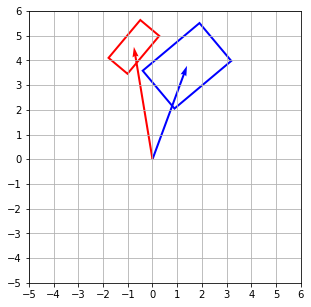

In [28]:
# 两个矩形初始状态
draw = Draw()
draw.rect(a, 'b')
draw.rect(b)
draw.v(aPos, 'b')
draw.v(bPos)
draw.render([-5, 7])

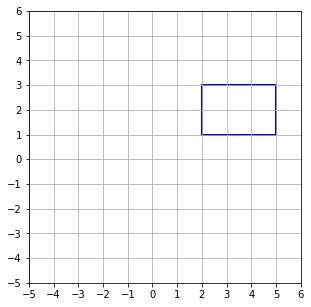

In [29]:
# 将坐标系转变为已a矩形为基准

aBase = np.array([iRotateA.dot(item) for item in a])

draw = Draw()
draw.rect(aBase, 'b')
draw.render([-5, 7])

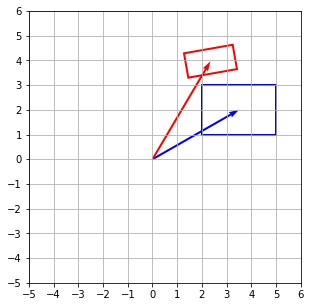

In [30]:
# a矩形坐标系下的两个矩形
bBase = np.array([iRotateA.dot(item) for item in b])

iAPos = iRotateA.dot(aPos)
iBPos = iRotateA.dot(bPos)

draw = Draw()
draw.v(iAPos, 'b')
draw.v(iBPos)
draw.rect(aBase, 'b')
draw.rect(bBase)
draw.render([-5, 7])

In [31]:
# 两个原点坐标的差
posTotal = abs(iBPos - iAPos)
posTotal

array([1.15334536, 1.96777167])

In [32]:
# b由于此刻是旋转的，所以b的半径向量需要重新算下
# 将变换矩阵取绝对值后点乘原来的半径向量得到的向量即是x,y的最大值

rotateC = iRotateA.dot(rotateB)

absRc = np.array([ abs(item) for item in rotateC ])
bh = absRc.dot(bhOrigin)
bh

array([1.07163184, 0.66605205])

In [33]:
#  b矩形x,y的最大值
bh + iBPos

array([3.41828648, 4.63382372])

In [34]:
# 可以和上方的值对比下
bBase

array([[1.44867097, 3.30171961],
       [3.41828648, 3.64901597],
       [3.2446383 , 4.63382372],
       [1.2750228 , 4.28652737],
       [0.        , 0.        ]])

In [35]:
rTotal = ahOrigin +  bh
rTotal

array([2.57163184, 1.66605205])

In [36]:
# x,y不全为负，所以不碰撞
posTotal - rTotal

array([-1.41828648,  0.30171961])